In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# tensorflow docker doesn't have keras in it
!pip install keras
import keras
from keras.datasets import mnist                     # Datasets
from keras.models import Sequential                  # Sequntial model
from keras.layers import Dense, Activation, Input    # Layers for model
from keras.callbacks import TensorBoard              # TensorBoard callback function for model.fit

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


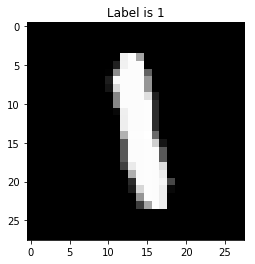

In [42]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

pixels = x_train[9487]
label = y_train[9487]

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')

plt.show()

In [43]:
# Set hyperparameters
learning_rate = 0.01
iteration = 50
batch_size = 128

### Preprocess the dataset
`x_train` & `x_test`: 0-255. Black to white.
* Reduce the range to 0~1

`y_train` & `y_test`: 0~9. Represent the corresponding digit.
* One-hot encoding

In [44]:
# Preprocess the data
o_y_train = y_train
x_train = x_train/255
y_train = keras.utils.to_categorical(y_train, num_classes=10)
x_test = x_test/255
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train[9487])

#for i in range(10):
#    print(o_y_train[i])
#    print(y_train[i])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [47]:
(x_1, y_1), (x_2, y_2) = mnist.load_data()

In [48]:
x_1 = x_1.T
print(x_1.shape)
x_1 = x_1.reshape(784, 60000)
print(x_1.shape)

x_2 = x_2.T
print(x_2.shape)
x_2 = x_2.reshape(784, 10000)
print(x_2.shape)

(28, 28, 60000)
(784, 60000)
(28, 28, 10000)
(784, 10000)


In [49]:
model_01 = Sequential()
model_02 = Sequential()
model_03 = Sequential()
model_04 = Sequential()

In [50]:
layer_1 = Dense(784, activation = 'relu', input_dim = 784, kernel_initializer='random_uniform',bias_initializer='zeros')
layer_2 = Dense(100, activation = 'relu')
layer_3 = Dense(30, activation = 'relu')
layer_4 = Dense(10, activation = 'softmax')

layer_1_1 = Dense(784, activation = 'relu', input_dim = 784, kernel_initializer='random_uniform',bias_initializer='zeros')
layer_2_1 = Dense(100, activation = 'relu')
layer_3_1 = Dense(30, activation = 'relu')
layer_4_1 = Dense(10, activation = 'softmax')

layer_1_2 = Dense(784, activation = 'relu', input_dim = 784, kernel_initializer='random_uniform',bias_initializer='zeros')
layer_2_2 = Dense(100, activation = 'relu')
layer_3_2 = Dense(30, activation = 'relu')
layer_4_2 = Dense(10, activation = 'softmax')

In [51]:
model_01.add(layer_1)
model_01.add(layer_2)
model_01.add(layer_3)
model_01.add(layer_4)

model_02.add(layer_1_1)
model_02.add(layer_2_1)
model_02.add(layer_3_1)
model_02.add(layer_4_1)

model_03.add(layer_1_2)
model_03.add(layer_2_2)
model_03.add(layer_3_2)
model_03.add(layer_4_2)

In [52]:
model_01.summary()
model_02.summary()
model_03.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_27 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
Total params: 697,280
Trainable params: 697,280
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 784)               615440    
_________________________________________________________________
dens

In [53]:
model_01.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
model_02.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
model_03.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
history_01 = model_01.fit(x_train, y_train, epochs=iteration, batch_size=batch_size, validation_split=0.1667, verbose = 1, callbacks=[TensorBoard(log_dir='./tmp/log_4')])
history_02 = model_02.fit(x_train, y_train, epochs=iteration, batch_size=batch_size, validation_split=0.1667, verbose = 1, callbacks=[TensorBoard(log_dir='./tmp/log_5')])
history_03 = model_03.fit(x_train, y_train, epochs=iteration, batch_size=batch_size, validation_split=0.1667, verbose = 1, callbacks=[TensorBoard(log_dir='./tmp/log_6')])

Train on 49998 samples, validate on 10002 samples
Epoch 1/50
49998/49998 [==============================] - 4s 75us/step - loss: 0.3011 - categorical_accuracy: 0.9089 - val_loss: 0.1290 - val_categorical_accuracy: 0.9642
Epoch 2/50
49998/49998 [==============================] - 3s 65us/step - loss: 0.1019 - categorical_accuracy: 0.9684 - val_loss: 0.0845 - val_categorical_accuracy: 0.9744
Epoch 3/50
49998/49998 [==============================] - 4s 71us/step - loss: 0.0667 - categorical_accuracy: 0.9797 - val_loss: 0.0882 - val_categorical_accuracy: 0.9724
Epoch 4/50
49998/49998 [==============================] - 3s 65us/step - loss: 0.0465 - categorical_accuracy: 0.9861 - val_loss: 0.0930 - val_categorical_accuracy: 0.9774
Epoch 5/50
49998/49998 [==============================] - 3s 63us/step - loss: 0.0345 - categorical_accuracy: 0.9892 - val_loss: 0.0859 - val_categorical_accuracy: 0.9785
Epoch 6/50
49998/49998 [==============================] - 4s 77us/step - loss: 0.0259 - categor

49998/49998 [==============================] - 3s 51us/step - loss: 0.0447 - categorical_accuracy: 0.9887 - val_loss: 0.0864 - val_categorical_accuracy: 0.9764
Epoch 46/50
49998/49998 [==============================] - 3s 50us/step - loss: 0.0434 - categorical_accuracy: 0.9889 - val_loss: 0.0865 - val_categorical_accuracy: 0.9757
Epoch 47/50
49998/49998 [==============================] - 3s 51us/step - loss: 0.0418 - categorical_accuracy: 0.9898 - val_loss: 0.0862 - val_categorical_accuracy: 0.9759
Epoch 48/50
49998/49998 [==============================] - 3s 52us/step - loss: 0.0402 - categorical_accuracy: 0.9902 - val_loss: 0.0846 - val_categorical_accuracy: 0.9760
Epoch 49/50
49998/49998 [==============================] - 3s 51us/step - loss: 0.0388 - categorical_accuracy: 0.9906 - val_loss: 0.0851 - val_categorical_accuracy: 0.9767
Epoch 50/50
49998/49998 [==============================] - 3s 55us/step - loss: 0.0375 - categorical_accuracy: 0.9910 - val_loss: 0.0854 - val_categoric

In [14]:
evaluate_01 = model_01.evaluate(x_test, y_test, batch_size = batch_size)
print("model_01: {}".format(evaluate_01))


10000/10000 [==============================] - 1s 69us/step
model_01: [0.15131403505802155, 0.957099974155426]


----- MNIST handwritten digit database -----

Training set size: 49998.0,
Dev set size: 10002.0,
Test set size: 10000

Learning rate: 0.01,
Iteration: 50,
Batch size: 30000

10000/10000 [==============================] - 0s 16us/step


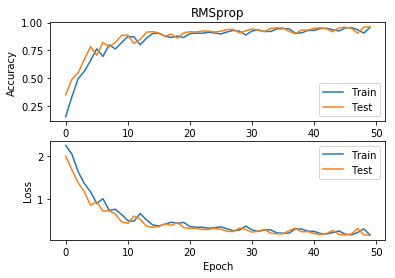

Loss: 0.15131403505802155, Acc: 0.957099974155426


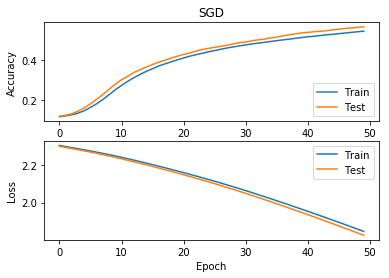

Loss: 1.825995683670044, Acc: 0.5566999912261963


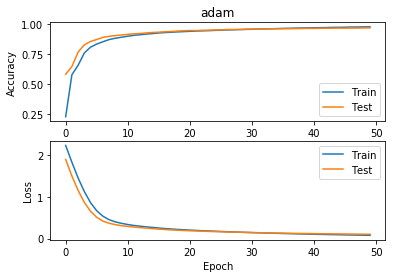

Loss: 0.10537546128034592, Acc: 0.9699000120162964


In [15]:
# Results
# print(history_01.history.keys())
print("----- MNIST handwritten digit database -----")
print("\nTraining set size: {},\nDev set size: {},\nTest set size: {}".format(len(x_train)*(1-0.1667), len(x_train)*0.1667, len(x_test)))
print("\nLearning rate: {},\nIteration: {},\nBatch size: {}\n".format(learning_rate, iteration, batch_size))
histories = [history_01.history, history_02.history, history_03.history]
evaluates = [model_01.evaluate(x_test, y_test, batch_size = batch_size),
            model_02.evaluate(x_test, y_test, batch_size = batch_size),
            model_03.evaluate(x_test, y_test, batch_size = batch_size)]
model_name = ['RMSprop', 'SGD', 'adam']
for i in range(3):
    
    # 繪製訓練 & 驗證的準確值
    plt.subplot(2,1,1)
    plt.plot(histories[i]['categorical_accuracy'])
    plt.plot(histories[i]['val_categorical_accuracy'])
    plt.title(model_name[i])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    
    # 繪製訓練 & 驗證的損失值
    plt.subplot(2,1,2)
    # plt.title('Model loss')
    plt.plot(histories[i]['loss'])
    plt.plot(histories[i]['val_loss'])
    
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    print("Loss: {}, Acc: {}".format(evaluates[i][0], evaluates[i][1]))
    
# 小心得
# 怎麼做得跟我一樣漂亮呢？
# 1. 用 TensorBoard 會幫你自動生出 Visualization 的 Model history
# 2. 用心土刻 QQ

In [16]:
predict = model_03.predict_classes(x_test[0].reshape(1,784))

In [17]:
for i in range(len(predict)):
    print(predict[i], end=' ')

7 